# Atividade 2 - Regressão Linear

Nesta atividade, será utilizado as bases de dados encontradas no link abaixo:
<br>
[Kaggle: house-prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)
<br>
<br>
Além disso, o relatório seguirá o modelo disponível no seguinte link:
<br>
[Modelo de Jupyter Notebook como relatório](https://nbviewer.org/github/Tanu-N-Prabhu/Python/blob/master/Exploratory_data_Analysis.ipynb)

## 1. Importando as bibliotecas necessárias para a realização da atividade

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split

sns.set()

## 2. Carregando os dados dos dataframes

### As bases de dados estão localizadas sob a pasta /database/raw/
Sendo elas:
* train.csv
* test.csv

In [3]:
train_df_raw = pd.read_csv("../databases/raw/train.csv", sep = ",", index_col = "Id")
test_df_raw = pd.read_csv("../databases/raw/test.csv", sep = ",", index_col = "Id")

### Alguns valores dos dataframes

#### train.csv

In [4]:
# Dez primeiras linhas do dataframe
train_df_raw.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [5]:
# Dez ultimas linhas do dataframe
train_df_raw.tail(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


#### test.csv

In [6]:
# Dez primeiras linhas do dataframe
test_df_raw.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal


In [7]:
# Dez ultimas linhas do dataframe
test_df_raw.tail(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
2910,180,RM,21.0,1470,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
2911,160,RM,21.0,1484,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
2912,20,RL,80.0,13384,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
2913,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml
2914,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


## 3. Verificando os tipos dos dados

### train.csv

In [8]:
train_df_raw.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

### test.csv

In [9]:
test_df_raw.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object

## 4. Excluindo colunas irrelevantes

### Imprimindo os nomes de todas as colunas:

In [10]:
train_df_raw.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### Verificando se há, de fato, valores nulos no dataframes:

In [11]:
train_df_raw.isnull().values.any()

True

### Verificando colunas que possuem valores nulos/faltantes:

In [12]:
colunas_com_nulos =[]

for column in train_df_raw.columns:
    if train_df_raw[column].isnull().values.any():
        colunas_com_nulos.append(column)
        print(column)
    

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


### Verificando quantidade de valores nulos nas colunas que possuem valores nulos/*NaN*s:

In [13]:
for column in colunas_com_nulos:
    print(column, ": ", train_df_raw[column].isnull().sum())


LotFrontage :  259
Alley :  1369
MasVnrType :  872
MasVnrArea :  8
BsmtQual :  37
BsmtCond :  37
BsmtExposure :  38
BsmtFinType1 :  37
BsmtFinType2 :  38
Electrical :  1
FireplaceQu :  690
GarageType :  81
GarageYrBlt :  81
GarageFinish :  81
GarageQual :  81
GarageCond :  81
PoolQC :  1453
Fence :  1179
MiscFeature :  1406


### Contando a quantidade total de linhas:

In [14]:
train_df_raw.shape[0]

1460

### Verificando, mais uma vez, os tipos das colunas que possuem valores nulos/*NaN*s:

In [15]:
print("COLUNA:\t\t\tTIPO:\n")

for column in colunas_com_nulos:
    print(column, "\t\t\t", train_df_raw[column].dtype)
    
print("Quantidade de colunas: ", len(colunas_com_nulos))

COLUNA:			TIPO:

LotFrontage 			 float64
Alley 			 object
MasVnrType 			 object
MasVnrArea 			 float64
BsmtQual 			 object
BsmtCond 			 object
BsmtExposure 			 object
BsmtFinType1 			 object
BsmtFinType2 			 object
Electrical 			 object
FireplaceQu 			 object
GarageType 			 object
GarageYrBlt 			 float64
GarageFinish 			 object
GarageQual 			 object
GarageCond 			 object
PoolQC 			 object
Fence 			 object
MiscFeature 			 object
Quantidade de colunas:  19


### Excluindo colunas que possuem mais da metade de seus dados como dados nulos/*NaN*s

#### Certificando-se das colunas corretas para excluir:

In [16]:
colunas_para_excluir = [column for column in colunas_com_nulos if (train_df_raw.shape[0] - train_df_raw[column].isnull().sum()) < (train_df_raw.shape[0] / 2.0)]
colunas_para_excluir.append("FireplaceQu")
print(colunas_para_excluir, "\nTamanho: ", len(colunas_para_excluir))

['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'] 
Tamanho:  6


#### Deletando as colunas:

In [17]:
train_df_raw = train_df_raw.drop(colunas_para_excluir, axis = 1)
train_df_raw.shape[1]

74

## 5. Renomeando algumas colunas

### Criando dicionário com os novos nomes para as colunas

In [18]:
colunas_para_renomear = {
    "MSSubClass" : "ms_sub_class",
    "MSZoning" : "ms_zoning",
    "LotFrontage" : "lot_frontage",
    "LotArea" : "lot_area",
    "Street" : "street",
    "LotShape" : "lot_shape",
    "LandContour" : "land_contour",
    "Utilities" : "utilities",
    "LotConfig" : "lot_config",
    "LandSlope" : "land_slope",
    "Neighborhood" : "neighborhood",
    "Condition1" : "condition_1",
    "Condition2" : "condition_2",
    "BldgType" : "building_type",
    "HouseStyle" : "house_style",
    "OverallQual" : "overall_quality",
    "OverallCond" : "overall_condition",
    "YearBuilt" : "year_built",
    "YearRemodAdd" : "year_remodelation_add",
    "RoofStyle" : "roof_style",
    "RoofMatl" : "roof_material",
    "Exterior1st" : "exterior_1st",
    "Exterior2nd" : "exterior_2nd",
    "MasVnrArea" : "masonry_veneer_area",
    "ExterQual" : "exterior_quality",
    "ExterCond" : "exterior_condition",
    "Foundation" : "foundation",
    "BsmtQual" : "basement_quality",
    "BsmtCond" : "basement_condition",
    "BsmtExposure" : "basement_expousure",
    "BsmtFinType1" : "basement_fin_type_1",
    "BsmtFinSF1" : "basement_fin_squared_feet_type_1",
    "BsmtFinType2" : "basement_fin_type_2",
    "BsmtFinSF2" : "basement_fin_squared_feet_2",
    "BsmtUnfSF" : "basement_unified_squared_feet",
    "TotalBsmtSF" : "total_basement_square_feet",
    "Heating" : "heating",
    "HeatingQC" : "heating_quality_control",
    "CentralAir" : "central_air",
    "Electrical" : "eletrical",
    "1stFlrSF" : "first_floor_squared_feet",
    "2ndFlrSF" : "second_floor_squared_feet",
    "LowQualFinSF" : "low_quality_fin_squared_feet",
    "GrLivArea" : "ground_living_area",
    "BsmtFullBath" : "basement_full_bathroom",
    "BsmtHalfBath" : "basement_half_bathroom",
    "FullBath" : "full_bathroom",
    "HalfBath" : "half_bathroom",
    "BedroomAbvGr" : "bedroom_above_ground",
    "KitchenAbvGr" : "kitchen_above_ground",
    "KitchenQual" : "kitchen_quality",
    "TotRmsAbvGrd" : "total_rooms_above_ground",
    "Functional" : "functional",
    "Fireplaces" : "fireplaces",
    "GarageType" : "garage_types",
    "GarageYrBlt" : "garage_year_built",
    "GarageFinish" : "garage_finish",
    "GarageCars" : "garage_cars",
    "GarageArea" : "garage_area",
    "GarageQual" : "garage_quality",
    "GarageCond" : "garage_condition",
    "PavedDrive" : "paved_drive",
    "WoodDeckSF" : "wood_deck_area_squared_feet",
    "OpenPorchSF" : "open_porch_area_squared_feet",
    "EnclosedPorch" : "enclosed_porch",
    "3SsnPorch" : "three_season_porch_area_square_feet",
    "ScreenPorch" : "screen_porch_area_squared_feet",
    "PoolArea" : "pool_area",
    "MiscVal" : "miscelaneous_features_value",
    "MoSold" : "month_sold",
    "YrSold" : "year_sold",
    "SaleType" : "sale_type",
    "SaleCondition" : "sale_condition",
    "SalePrice" : "sale_price"
}

### Renomeando as colunas

In [19]:
train_df_raw.rename(columns = colunas_para_renomear, inplace = True)

## 6.1. Excluindo valores duplicados

In [20]:
linhas_com_valores_duplicadas = train_df_raw[train_df_raw.duplicated()]
print("Número  de linhas duplicadas: ", linhas_com_valores_duplicadas.shape[0])

Número  de linhas duplicadas:  0


Não houveram linhas duplicadas, então nada precisa ser feito sobre o dataframe.

## 6.2. Deletando os valores faltantes e valores nulos

### Verificando a quantidade de valores nulos/faltantes

In [21]:
print("COLUNA\t\tQUANTIDADE\tTIPO\n")
colunas_com_nan = []

for column in train_df_raw.columns:
    if train_df_raw[column].isnull().sum() > 0:
        print(column, "\t", train_df_raw[column].isnull().sum(), "\t\t", train_df_raw[column].dtype)
        colunas_com_nan.append(column)
    

COLUNA		QUANTIDADE	TIPO

lot_frontage 	 259 		 float64
masonry_veneer_area 	 8 		 float64
basement_quality 	 37 		 object
basement_condition 	 37 		 object
basement_expousure 	 38 		 object
basement_fin_type_1 	 37 		 object
basement_fin_type_2 	 38 		 object
eletrical 	 1 		 object
garage_types 	 81 		 object
garage_year_built 	 81 		 float64
garage_finish 	 81 		 object
garage_quality 	 81 		 object
garage_condition 	 81 		 object


## 7. Modificando os valores *NaN*s

Foi escolhido não deletar as linhas com valores *NaN*s.
<br>
Ao invés disso, foi escolhido substituí-los por outros valores:
* mediana (para valores numéricos)
* unknown (para valores categóricos)

In [22]:
valor_desconhecido = "unknown"

for column in colunas_com_nan:
   if (train_df_raw[column].dtype == "object"):
       train_df_raw[column].fillna(valor_desconhecido)
   else:
       mediana = train_df_raw[column].median()
       train_df_raw[column].fillna(mediana)


##### Imprimindo o dataframe modificado

In [23]:
train_df_raw.head(10)

,ms_sub_class,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,...,enclosed_porch,three_season_porch_area_square_feet,screen_porch_area_squared_feet,pool_area,miscelaneous_features_value,month_sold,year_sold,sale_type,sale_condition,sale_price
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900


## 8. Detectando outliers

### Utilizando o BoxPlot, veremos a quantidade de outlier dos dados numéricos

#### Imprimindo os nomes das colunas com valores numéricos somente

In [24]:
train_df_raw.select_dtypes(include = np.number)

,ms_sub_class,lot_frontage,lot_area,overall_quality,overall_condition,year_built,year_remodelation_add,masonry_veneer_area,basement_fin_squared_feet_type_1,basement_fin_squared_feet_2,...,wood_deck_area_squared_feet,open_porch_area_squared_feet,enclosed_porch,three_season_porch_area_square_feet,screen_porch_area_squared_feet,pool_area,miscelaneous_features_value,month_sold,year_sold,sale_price
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


#### Coluna *lot_frontage*

<Axes: ylabel='lot_frontage'>

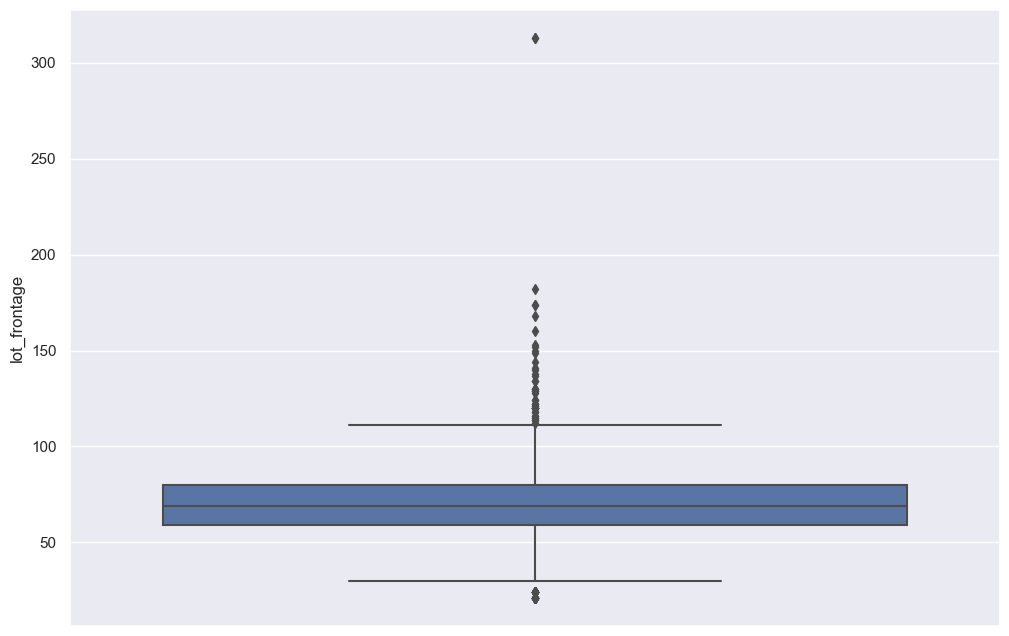

In [25]:
plt.figure(figsize = (12,8))
sns.boxplot(y = train_df_raw.lot_frontage)

O gráfico acima demonstra que há muitos dados outliers na coluna ***lot_frontage***. No entanto, a mediana não está deslocada em relação a média geral.

#### Coluna *sale_price*

<Axes: ylabel='sale_price'>

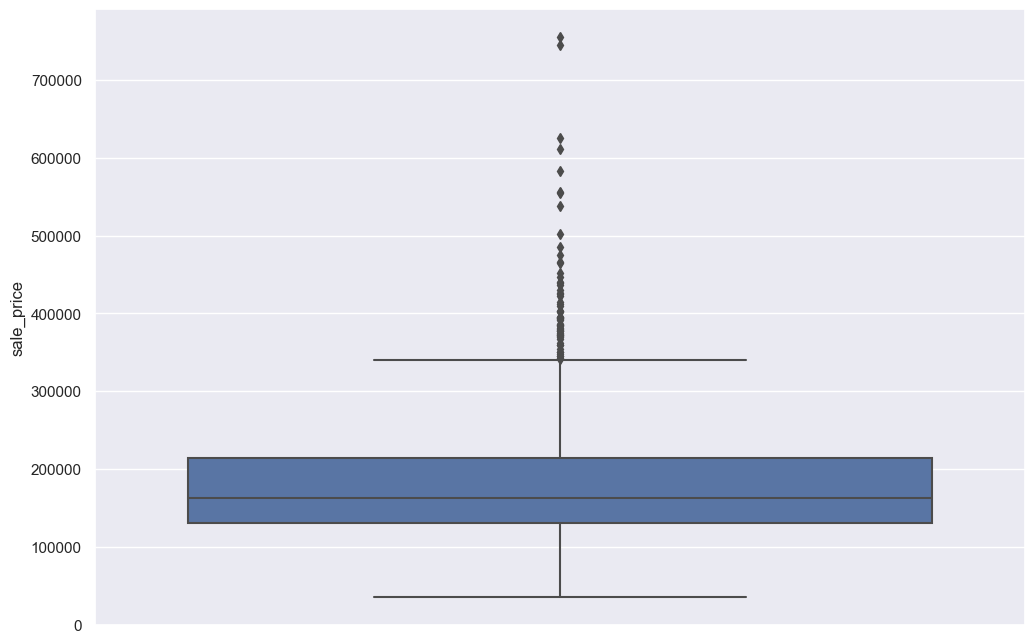

In [26]:
plt.figure(figsize = (12,8))
sns.boxplot(y = train_df_raw.sale_price)

O gráfico acima demonstra que há muitos dados outliers na coluna ***sale_price***. Além disso, a mediana está deslocada em relação a média geral.

#### Coluna *miscelaneous_features_value*

<Axes: ylabel='miscelaneous_features_value'>

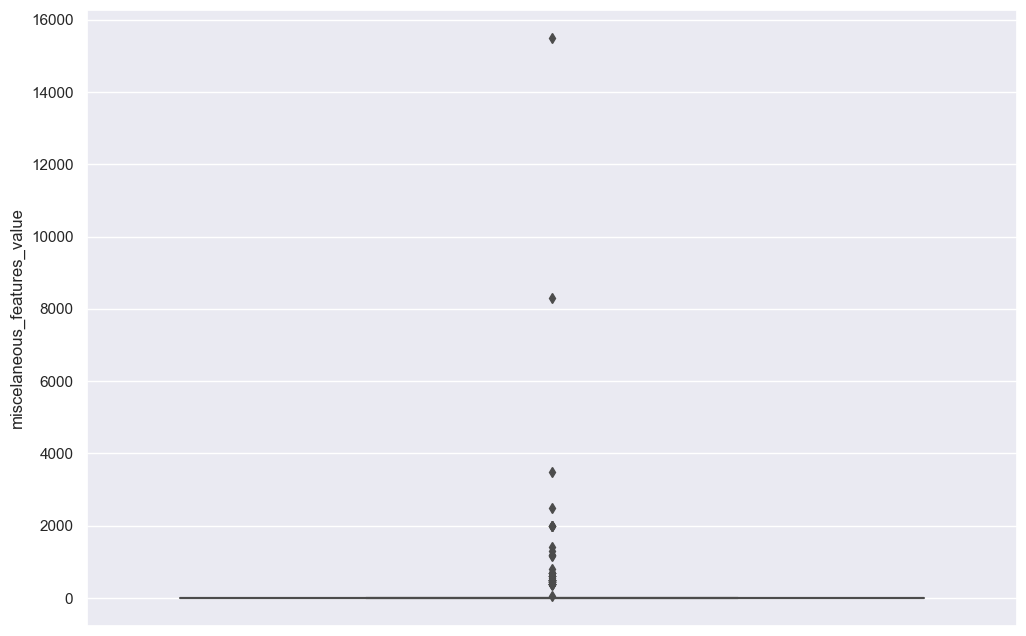

In [27]:
plt.figure(figsize = (12,8))
sns.boxplot(y = train_df_raw.miscelaneous_features_value)

É possível notar, com esse boxplot, que a enorme maioria dos dados da coluna ***miscelaneous_features_value*** são outliers. Estão muito acima do terceiro quartil.

### Verificando os quartis

In [28]:
primeiro_quartil = train_df_raw.select_dtypes(include = np.number).quantile(0.25)
terceiro_quartil = train_df_raw.select_dtypes(include = np.number).quantile(0.75)
inter_quartil = terceiro_quartil - primeiro_quartil
print(inter_quartil)

ms_sub_class                              50.00
lot_frontage                              21.00
lot_area                                4048.00
overall_quality                            2.00
overall_condition                          1.00
year_built                                46.00
year_remodelation_add                     37.00
masonry_veneer_area                      166.00
basement_fin_squared_feet_type_1         712.25
basement_fin_squared_feet_2                0.00
basement_unified_squared_feet            585.00
total_basement_square_feet               502.50
first_floor_squared_feet                 509.25
second_floor_squared_feet                728.00
low_quality_fin_squared_feet               0.00
ground_living_area                       647.25
basement_full_bathroom                     1.00
basement_half_bathroom                     0.00
full_bathroom                              1.00
half_bathroom                              1.00
bedroom_above_ground                    

Acima são as distâncias entre o primeiro e o terceiro quartil.

### Removendo as linhas com outliers do dataframe

In [29]:
train_df_processed = train_df_raw

Como vamos mexer muito com o dataframe, decidimos trabalhar com uma variável separada para evitar perda dos dados.

In [30]:
# for column in inter_quartil.index:
#    maximo = terceiro_quartil[column] + (1.5 * inter_quartil[column])
#    minimo = primeiro_quartil[column] - (1.5 * inter_quartil[column])
#    train_df_processed = train_df_processed[(train_df_processed[column] >= minimo) & (train_df_processed[column] <= maximo)]


A célula acima está completamente comentada pois foi notado que, após a execução da limpeza, muitos dados relevantes são perdidos. E esses dados são importantes para evitar o overfitting da regressão.

### Ao final da exlusão, o dataframe ficou:

In [31]:
#train_df_processed.shape

### Observação após a regressão linear

Após a exclusão de algumas linhas, nos tópicos [14.1](#141-regressão-linear) e [14.2](#142-regressão-linear-utilizando-a-coluna-ground_living_area) (regressão linear), foi notado uma centralização exagerado dos dados dataframe, perde enorme de dados (1460 linhas tornavam-se 443 linhas).
<br>
Portanto foi decido por não fazer nenhuma exclusão de linhas.

## 9. Imprimindo as diferenças entre as colunas

### Histograma

Text(0.5, 0, 'Estilo de construção')

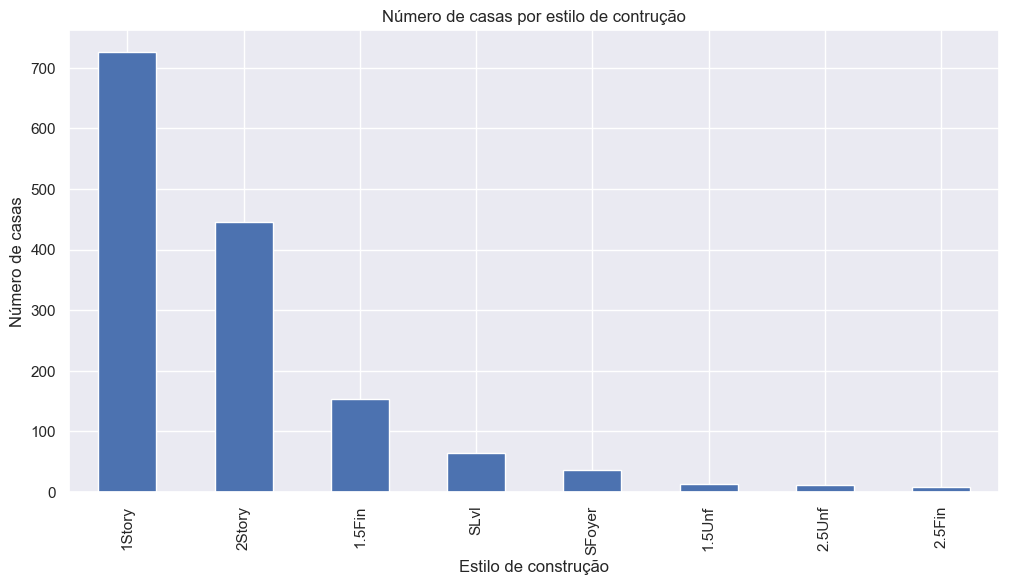

In [32]:
train_df_processed.house_style.value_counts().nlargest(40).plot(kind = "bar", figsize = (12, 6))
plt.title("Número de casas por estilo de contrução")
plt.ylabel("Número de casas")
plt.xlabel("Estilo de construção")

O gráfico acima mostra que a maioria das casas catalogas possuem apenas 1 único andar, o térreo (primeiro piso).
<br>
Logo após, as casas com 2 andares (térreo e primeiro andar).

### Mapa de calor (heatmap)

#### Salvando a correlação em uma variável

In [33]:
correlacao = train_df_processed.select_dtypes(include = np.number).corr(numeric_only = True)

#### Imprimindo o mapa de calor

<Axes: >

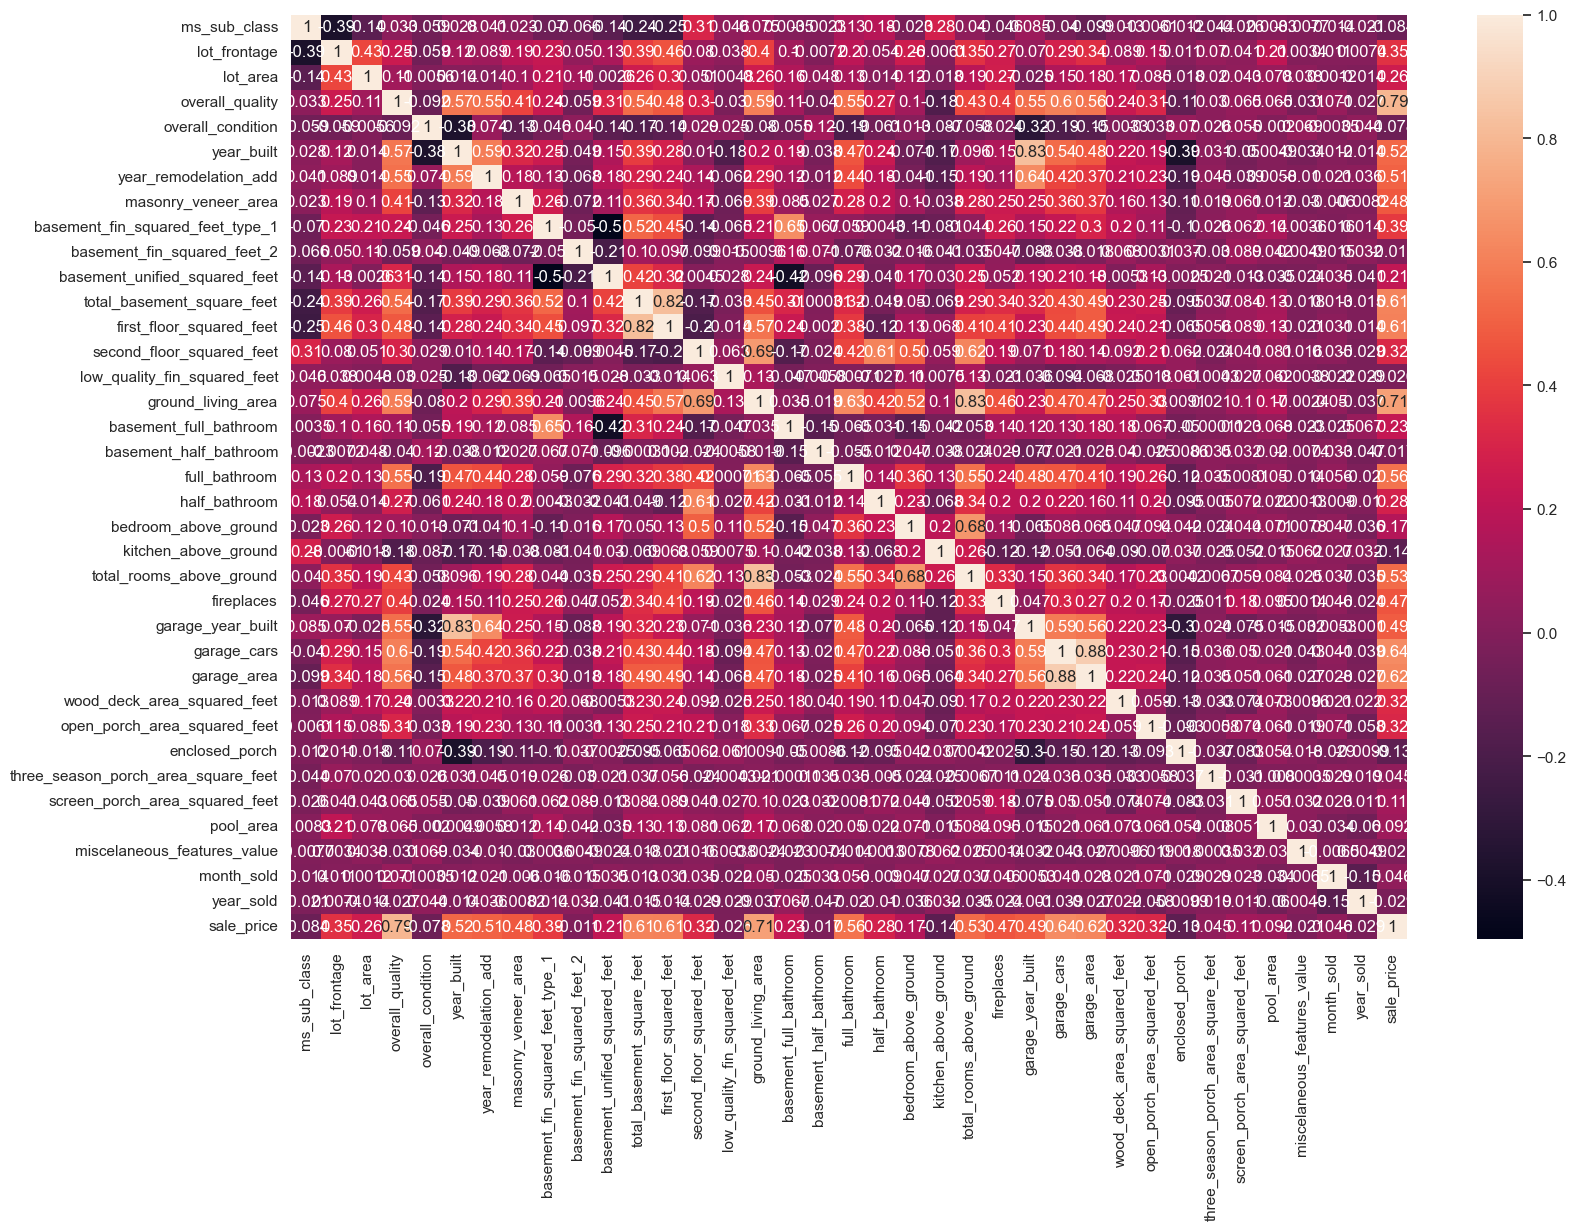

In [34]:
figure = plt.figure(figsize = (18, 12))
sns.heatmap(correlacao, annot = True)

Há muita informação no mapa de calor. Não é possível obter uma informação concisa desta forma.

#### Imprimindo as correlações

In [35]:
correlacao

,ms_sub_class,lot_frontage,lot_area,overall_quality,overall_condition,year_built,year_remodelation_add,masonry_veneer_area,basement_fin_squared_feet_type_1,basement_fin_squared_feet_2,...,wood_deck_area_squared_feet,open_porch_area_squared_feet,enclosed_porch,three_season_porch_area_square_feet,screen_porch_area_squared_feet,pool_area,miscelaneous_features_value,month_sold,year_sold,sale_price
ms_sub_class,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
lot_frontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
lot_area,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
overall_quality,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
overall_condition,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
year_built,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
year_remodelation_add,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
masonry_veneer_area,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
basement_fin_squared_feet_type_1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
basement_fin_squared_feet_2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


Diferente do mapa de calor, é possível observar os dados na tabela acima. No entanto, ainda é uma carga muito alta de dados.

### Mudando os tipos das colunas que afetaram no resultado do mapa de calor
Os tipos não numéricos afetaram negativamente a correlação e o mapa de calor. Então foi decidido trocar para o tipo numérico e realizar o mapa de calor novamente.
<br>
Houveram também tipos numéricos com muitos valores nulos (0) que atrabalharam a observação. Essas colunas serão deletadas

#### Salvando as colunas para deletar em uma lista

In [36]:
colunas_para_excluir = [
    "basement_fin_squared_feet_2", "low_quality_fin_squared_feet", "basement_half_bathroom", "kitchen_above_ground",
    "enclosed_porch", "three_season_porch_area_square_feet", "screen_porch_area_squared_feet", "pool_area"
    ]

#### Deletando as colunas

In [37]:
train_df_processed = train_df_processed.drop(columns = colunas_para_excluir, axis = 1)

#### Imprimindo o dataframe resultante

In [38]:
train_df_processed

,ms_sub_class,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,...,garage_condition,paved_drive,wood_deck_area_squared_feet,open_porch_area_squared_feet,miscelaneous_features_value,month_sold,year_sold,sale_type,sale_condition,sale_price
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,61,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,Y,298,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,42,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,Y,0,35,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,Y,192,84,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,40,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,349,0,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,60,2500,5,2010,WD,Normal,266500


#### Salvando os nomes das colunas em uma lista

In [39]:
colunas_categoricas = [column for column in train_df_processed.columns if train_df_processed[column].dtype == "object"]
colunas_categoricas

['ms_zoning',
 'street',
 'lot_shape',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'neighborhood',
 'condition_1',
 'condition_2',
 'building_type',
 'house_style',
 'roof_style',
 'roof_material',
 'exterior_1st',
 'exterior_2nd',
 'exterior_quality',
 'exterior_condition',
 'foundation',
 'basement_quality',
 'basement_condition',
 'basement_expousure',
 'basement_fin_type_1',
 'basement_fin_type_2',
 'heating',
 'heating_quality_control',
 'central_air',
 'eletrical',
 'kitchen_quality',
 'functional',
 'garage_types',
 'garage_finish',
 'garage_quality',
 'garage_condition',
 'paved_drive',
 'sale_type',
 'sale_condition']

#### Checando os valores únicos de cada coluna

In [40]:
for column in colunas_categoricas:
    print(train_df_processed[column].value_counts())
    print("\n")

ms_zoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


street
Pave    1454
Grvl       6
Name: count, dtype: int64


lot_shape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64


land_contour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64


utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64


lot_config
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64


land_slope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64


neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2


As colunas:
* street
* utilities
* condition_2
* roof_material
* basement_fin_type_2
<br>
<br>
<p>Possuem valor único para todos os registros, então foi escolhido deletá-las</p>
A coluna <i><b>miscelaneous_features_value</b></i> é numérica, mas não possui correlação com nenhuma outra coluna, então foi decidido deletá-la.

#### Deletando as colunas sinalizadas acima

In [41]:
train_df_processed = train_df_processed.drop(columns = ["street", "utilities", "condition_2", "roof_material", "basement_fin_type_2", "miscelaneous_features_value"], axis = 1)

#### Imprimindo o dataframe modificado

In [42]:
train_df_processed

,ms_sub_class,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,lot_config,land_slope,neighborhood,condition_1,...,garage_quality,garage_condition,paved_drive,wood_deck_area_squared_feet,open_porch_area_squared_feet,month_sold,year_sold,sale_type,sale_condition,sale_price
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,0,61,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,TA,TA,Y,298,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,0,42,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,TA,TA,Y,0,35,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,TA,TA,Y,192,84,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Reg,Lvl,Inside,Gtl,Gilbert,Norm,...,TA,TA,Y,0,40,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Reg,Lvl,Inside,Gtl,NWAmes,Norm,...,TA,TA,Y,349,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Reg,Lvl,Inside,Gtl,Crawfor,Norm,...,TA,TA,Y,0,60,5,2010,WD,Normal,266500


#### Renovando a lista de colunas categóricas

In [43]:
colunas_categoricas = [column for column in train_df_processed.columns if train_df_processed[column].dtype == "object"]

#### Mais uma vez, faremos o mapa de calor

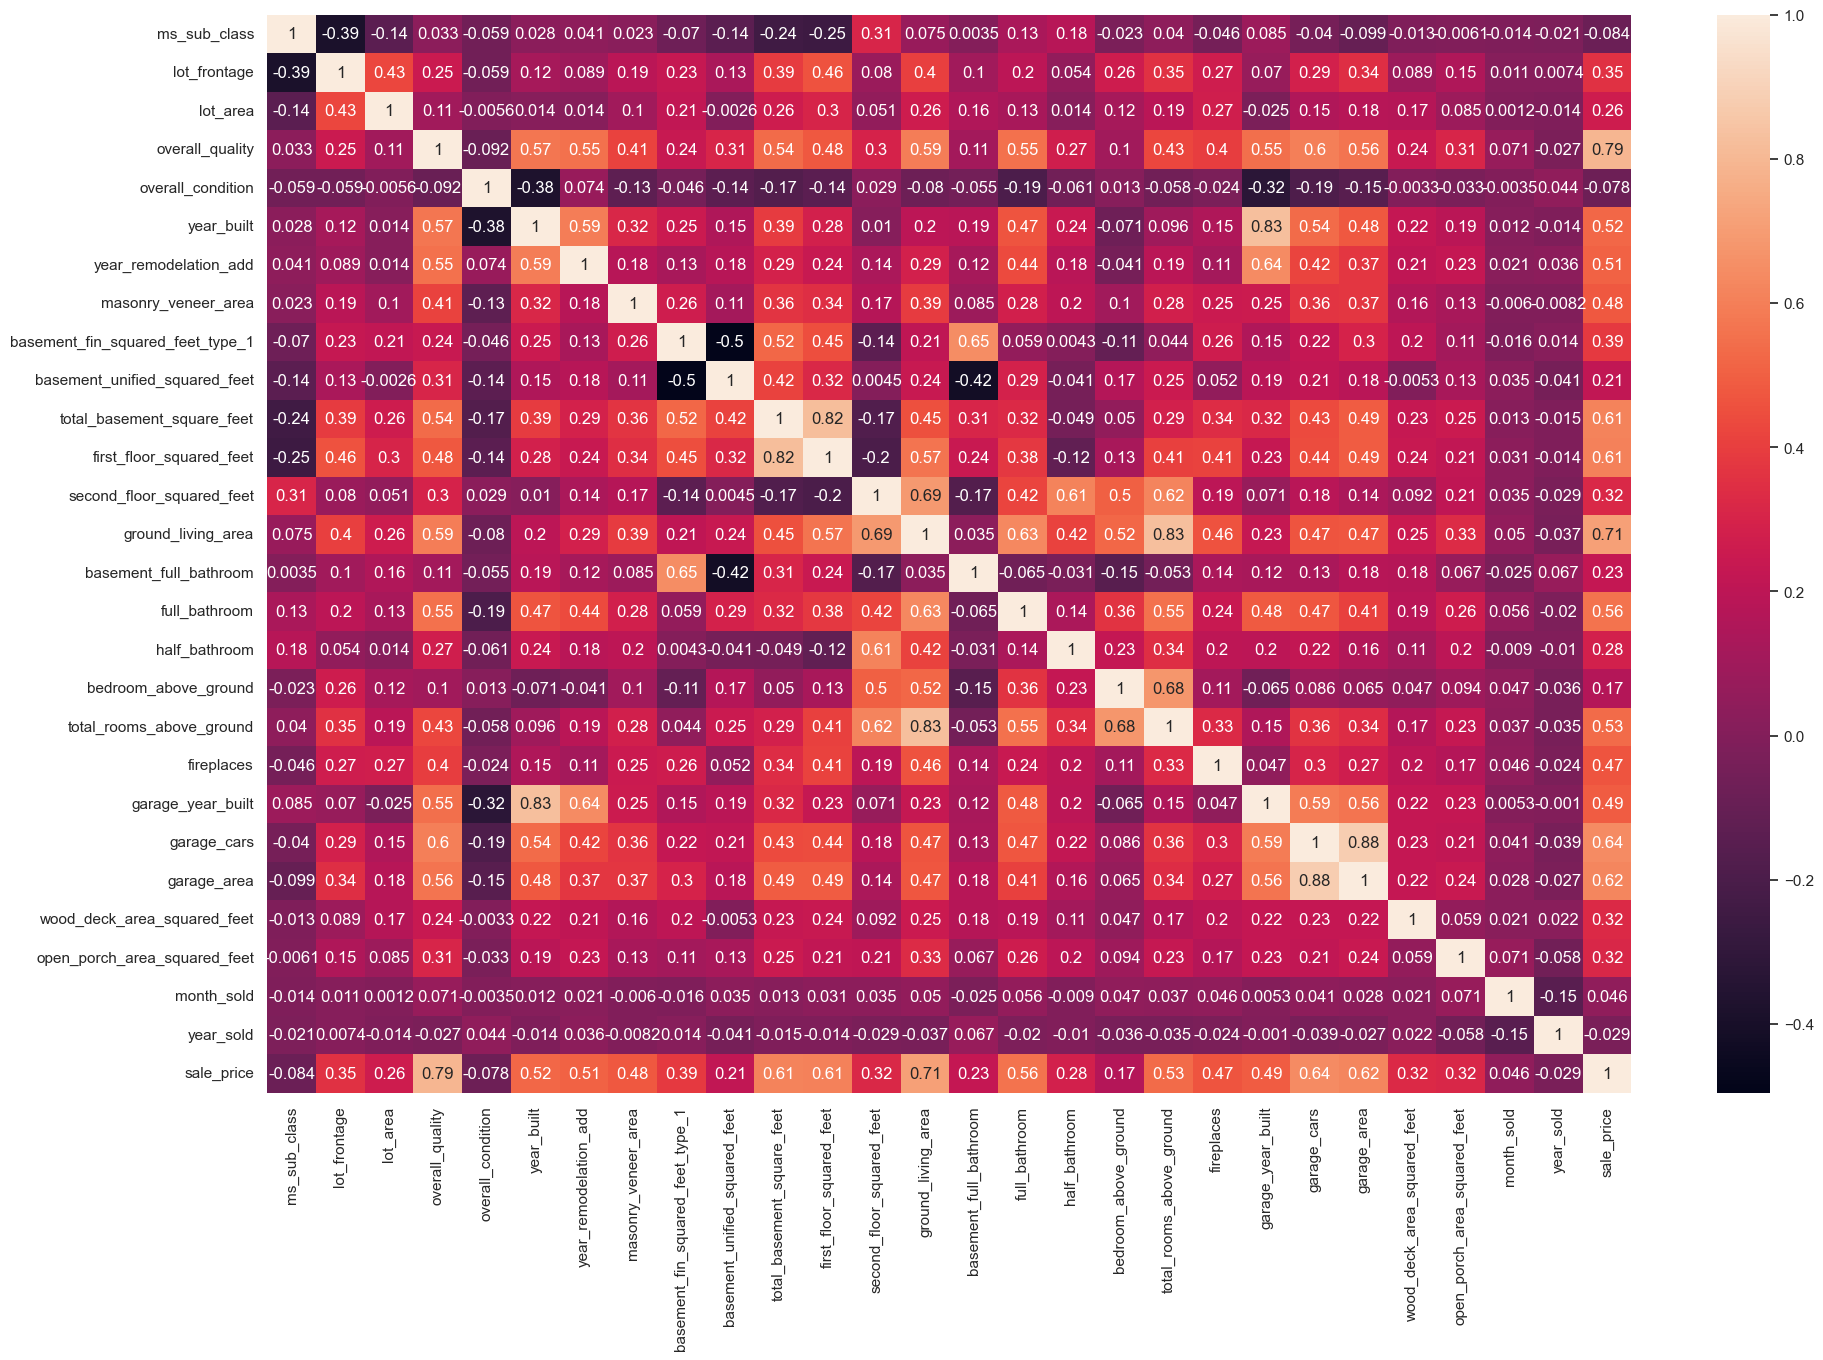

In [44]:
correlacao = train_df_processed.corr(numeric_only = True)
figure = plt.figure(figsize = (22, 14))
sns.heatmap(correlacao, annot = True)
plt.show()

Observando o gráfico de mapa de cloar acima, é possível notar que as colunas que melhor se relacionam com a coluna ***sale_price*** (o preço final o qual a casa foi vendida) são:
* overall_quality
* ground_living_area
* garage_cars
* garage_area
##### Respectivamente em ordem descendente de correlação.

#### Imprimindo as correlações

In [45]:
correlacao

,ms_sub_class,lot_frontage,lot_area,overall_quality,overall_condition,year_built,year_remodelation_add,masonry_veneer_area,basement_fin_squared_feet_type_1,basement_unified_squared_feet,...,total_rooms_above_ground,fireplaces,garage_year_built,garage_cars,garage_area,wood_deck_area_squared_feet,open_porch_area_squared_feet,month_sold,year_sold,sale_price
ms_sub_class,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.140759,...,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.013585,-0.021407,-0.084284
lot_frontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.132644,...,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.011200,0.007450,0.351799
lot_area,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,-0.002618,...,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,0.001205,-0.014261,0.263843
overall_quality,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,0.308159,...,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,0.070815,-0.027347,0.790982
overall_condition,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,-0.136841,...,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,-0.003511,0.043950,-0.077856
year_built,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,0.149040,...,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,0.012398,-0.013618,0.522897
year_remodelation_add,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,0.181133,...,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,0.021490,0.035743,0.507101
masonry_veneer_area,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,0.114442,...,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.005965,-0.008201,0.477493
basement_fin_squared_feet_type_1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.495251,...,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.015727,0.014359,0.386420
basement_unified_squared_feet,-0.140759,0.132644,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.114442,-0.495251,1.000000,...,0.250647,0.051575,0.190708,0.214175,0.183303,-0.005316,0.129005,0.034888,-0.041258,0.214479


A tabela acima demonstra, de forma mais matemática, o que foi observado no gráfico mapa de calor.

### Gráfico de Dispersão (scatterplot)

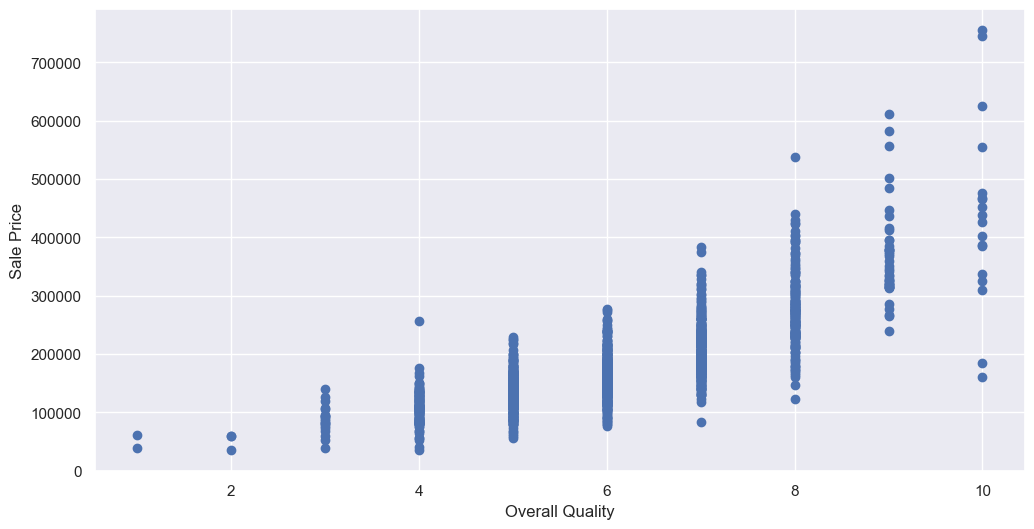

In [46]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.scatter(train_df_processed.overall_quality, train_df_processed.sale_price)
ax.set_xlabel("Overall Quality")
ax.set_ylabel("Sale Price")
plt.show()

É possível notar na imagem acima, que a coluna ***overall_quality*** não possui predisposição a regressão linear. Seus dados estão se comportando como uma coluna categórica, com os dados separados em intervalos constantes na horizontal e aglutinados na vertical.

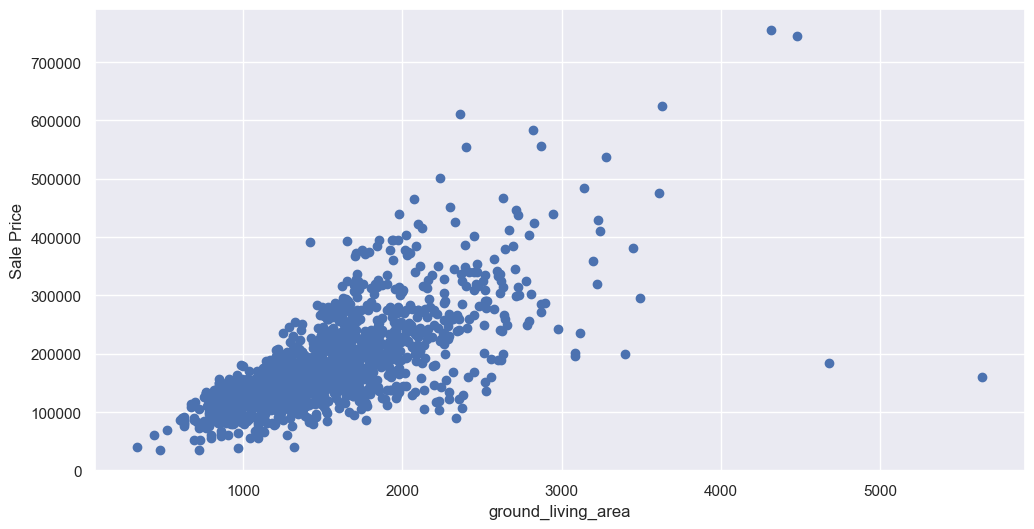

In [47]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.scatter(train_df_processed.ground_living_area, train_df_processed.sale_price)
ax.set_xlabel("ground_living_area")
ax.set_ylabel("Sale Price")
plt.show()

É possível notar na imagem acima, que a coluna ***ground_living_area*** possui uma predisposição a regressão linear.

## 10. Conclusão da observação estatística

Para realizar a regressão linear, foram escolhidas as colunas ***overall_quality*** e ***ground_living_area***, que demonstraram, tanto no gráfico de calor (heatmap), quanto no gráfico de dispersão,
<br>
que seu comportamento é estável e sua correlação com o preço final (*sale price*) é alta.

## 11. Tratamento de dados

### Conversão de tipos
#### Será feita uma conversão de tipos para que o dataframe consuma menos memória e diminua seu tempo de processamento
#### Também será feita a conversão do tipo <i><b>object</b></i> para o tipo <i><b>category</b></i>

#### Object -> Category

In [48]:
for column in colunas_categoricas:
    train_df_processed[column] = train_df_processed[column].astype("category")

#### Valores numéricos

##### Verificando valores máximos e mínimos

In [49]:
# CONFERINDO OS VALORES MAXIMOS
train_df_raw.select_dtypes(include = np.number).agg("max")

ms_sub_class                              190.0
lot_frontage                              313.0
lot_area                               215245.0
overall_quality                            10.0
overall_condition                           9.0
year_built                               2010.0
year_remodelation_add                    2010.0
masonry_veneer_area                      1600.0
basement_fin_squared_feet_type_1         5644.0
basement_fin_squared_feet_2              1474.0
basement_unified_squared_feet            2336.0
total_basement_square_feet               6110.0
first_floor_squared_feet                 4692.0
second_floor_squared_feet                2065.0
low_quality_fin_squared_feet              572.0
ground_living_area                       5642.0
basement_full_bathroom                      3.0
basement_half_bathroom                      2.0
full_bathroom                               3.0
half_bathroom                               2.0
bedroom_above_ground                    

In [50]:
# CONFERINDO OS VALORES MINIMOS
train_df_raw.select_dtypes(include = np.number).agg("min")

ms_sub_class                              20.0
lot_frontage                              21.0
lot_area                                1300.0
overall_quality                            1.0
overall_condition                          1.0
year_built                              1872.0
year_remodelation_add                   1950.0
masonry_veneer_area                        0.0
basement_fin_squared_feet_type_1           0.0
basement_fin_squared_feet_2                0.0
basement_unified_squared_feet              0.0
total_basement_square_feet                 0.0
first_floor_squared_feet                 334.0
second_floor_squared_feet                  0.0
low_quality_fin_squared_feet               0.0
ground_living_area                       334.0
basement_full_bathroom                     0.0
basement_half_bathroom                     0.0
full_bathroom                              0.0
half_bathroom                              0.0
bedroom_above_ground                       0.0
kitchen_above

##### Colunas de tipo inteiro (<i>integer</i>)

In [51]:
# Valores comuns
train_df_processed.ms_sub_class = train_df_processed.ms_sub_class.astype("uint8")

# Valores que podem ser tratados como categoricos
train_df_processed.overall_quality = train_df_processed.overall_quality.astype("uint8")
train_df_processed.overall_condition = train_df_processed.overall_condition.astype("uint8")

# ANOS / MESES
train_df_processed.year_built = train_df_processed.year_built.astype("uint16")
train_df_processed.year_remodelation_add = train_df_processed.year_remodelation_add.astype("uint16")
train_df_processed.garage_year_built = train_df_processed.garage_year_built.fillna(train_df_processed.garage_year_built.median()).astype("uint16")
train_df_processed.month_sold = train_df_processed.month_sold.astype("uint8")
train_df_processed.year_sold = train_df_processed.year_sold.astype("uint16")

# Valores de quantidade
train_df_processed.basement_full_bathroom = train_df_processed.basement_full_bathroom.astype("uint8")
train_df_processed.full_bathroom = train_df_processed.full_bathroom.astype("uint8")
train_df_processed.half_bathroom = train_df_processed.half_bathroom.astype("uint8")
train_df_processed.bedroom_above_ground = train_df_processed.bedroom_above_ground.astype("uint8")
train_df_processed.total_rooms_above_ground = train_df_processed.total_rooms_above_ground.astype("uint8")
train_df_processed.fireplaces = train_df_processed.fireplaces.astype("uint8")
train_df_processed.garage_cars = train_df_processed.garage_cars.astype("uint8")
train_df_processed.fireplaces = train_df_processed.fireplaces.astype("uint8")

##### Colunas de tipo ponto flutuante (<i>float</i> e <i>double</i>)

In [52]:
train_df_processed.lot_frontage = train_df_processed.lot_frontage.astype("float16")
train_df_processed.lot_area = train_df_processed.lot_area.astype("float64")
train_df_processed.masonry_veneer_area = train_df_processed.masonry_veneer_area.astype("float32")
train_df_processed.basement_fin_squared_feet_type_1 = train_df_processed.basement_fin_squared_feet_type_1.astype("float32")
train_df_processed.basement_unified_squared_feet = train_df_processed.basement_unified_squared_feet.astype("float32")
train_df_processed.total_basement_square_feet = train_df_processed.total_basement_square_feet.astype("float32")
train_df_processed.first_floor_squared_feet = train_df_processed.first_floor_squared_feet.astype("float32")
train_df_processed.second_floor_squared_feet = train_df_processed.second_floor_squared_feet.astype("float32")
train_df_processed.ground_living_area  = train_df_processed.ground_living_area .astype("float32")
train_df_processed.wood_deck_area_squared_feet = train_df_processed.wood_deck_area_squared_feet.astype("float32")
train_df_processed.open_porch_area_squared_feet = train_df_processed.open_porch_area_squared_feet.astype("float32")
train_df_processed.sale_price = train_df_processed.sale_price.astype("float64")

#### Imprimindo o dataframe tratado

In [53]:
train_df_processed

,ms_sub_class,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,lot_config,land_slope,neighborhood,condition_1,...,garage_quality,garage_condition,paved_drive,wood_deck_area_squared_feet,open_porch_area_squared_feet,month_sold,year_sold,sale_type,sale_condition,sale_price
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450.0,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,0.0,61.0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600.0,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,TA,TA,Y,298.0,0.0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250.0,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,0.0,42.0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550.0,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,TA,TA,Y,0.0,35.0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260.0,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,TA,TA,Y,192.0,84.0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917.0,Reg,Lvl,Inside,Gtl,Gilbert,Norm,...,TA,TA,Y,0.0,40.0,8,2007,WD,Normal,175000.0
1457,20,RL,85.0,13175.0,Reg,Lvl,Inside,Gtl,NWAmes,Norm,...,TA,TA,Y,349.0,0.0,2,2010,WD,Normal,210000.0
1458,70,RL,66.0,9042.0,Reg,Lvl,Inside,Gtl,Crawfor,Norm,...,TA,TA,Y,0.0,60.0,5,2010,WD,Normal,266500.0


## 12. Salvando o dataframe tratado

### O dataframe será salvo em /database/processed/
### Foi escolhido a estensão <i>pickle</i> para salvar o arquivo
### O nome será: "train_house_sale_processed.pkl"
A célula abaixo ficará como comentário de código

In [54]:
# train_df_processed.to_pickle(path = "../databases/processed/train_house_sale_processed.pkl")

## 13. Ler arquivo tratado salvo em /databases/processed
### Atalho para a regressão, sem precisar todo o tratamento anterior
A célula abaixo ficará como comentário de código

In [55]:
# train_df_processed = pd.read_csv("../databases/raw/test.csv", index_col = "Id")

## 14.1. Regressão linear

### Normalizando as duas colunas que serão utilizadas:
* sale_price
* overall_quality

In [56]:
train_df_processed["overall_quality"] = (train_df_processed["overall_quality"] - train_df_processed["overall_quality"].min()) / (train_df_processed["overall_quality"].max() - train_df_processed["overall_quality"].min())
train_df_processed["sale_price"] = (train_df_processed["sale_price"] - train_df_processed["sale_price"].min()) / (train_df_processed["sale_price"].max() - train_df_processed["sale_price"].min())

***overall_quality*** e ***sale_price*** foram normalizados utilizando a fórmula: (valor_atual - valor_minimo) / (valor_maximo - valor_minimo)

### Calculando θ<sub>0</sub> e θ<sub>1</sub>

In [68]:
x = train_df_processed[["overall_quality"]]
y = train_df_processed.sale_price

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
modelo_linear = LinearRegression().fit(x_train, y_train)

theta_0 = modelo_linear.intercept_
theta_1 = modelo_linear.coef_

### Imprimindo θ<sub>0</sub> e θ<sub>1</sub>

In [58]:
print("Theta 0 = ", theta_0)
print("Theta 1 = ", theta_1[0])

Theta 0 =  -0.11398520372101043
Theta 1 =  0.5577242902908953


### Fazendo previsão dos dados

In [59]:
predicao = modelo_linear.predict(x_test)
predicao

array([0.19586162, 0.31980036, 0.07192289, 0.25783099, 0.19586162,
       0.25783099, 0.25783099, 0.19586162, 0.13389226, 0.25783099,
       0.07192289, 0.13389226, 0.19586162, 0.07192289, 0.13389226,
       0.19586162, 0.25783099, 0.13389226, 0.07192289, 0.19586162,
       0.13389226, 0.25783099, 0.25783099, 0.13389226, 0.25783099,
       0.31980036, 0.31980036, 0.19586162, 0.07192289, 0.07192289,
       0.31980036, 0.19586162, 0.19586162, 0.07192289, 0.19586162,
       0.13389226, 0.25783099, 0.13389226, 0.19586162, 0.19586162,
       0.13389226, 0.31980036, 0.13389226, 0.25783099, 0.13389226,
       0.07192289, 0.19586162, 0.19586162, 0.13389226, 0.31980036,
       0.25783099, 0.19586162, 0.25783099, 0.25783099, 0.19586162,
       0.13389226, 0.13389226, 0.25783099, 0.13389226, 0.25783099,
       0.25783099, 0.44373909, 0.19586162, 0.38176972, 0.25783099,
       0.13389226, 0.19586162, 0.13389226, 0.13389226, 0.07192289,
       0.13389226, 0.13389226, 0.13389226, 0.19586162, 0.13389

### Plotando o resultado final
* Gráfico de dispersão
* Gráfico da reta

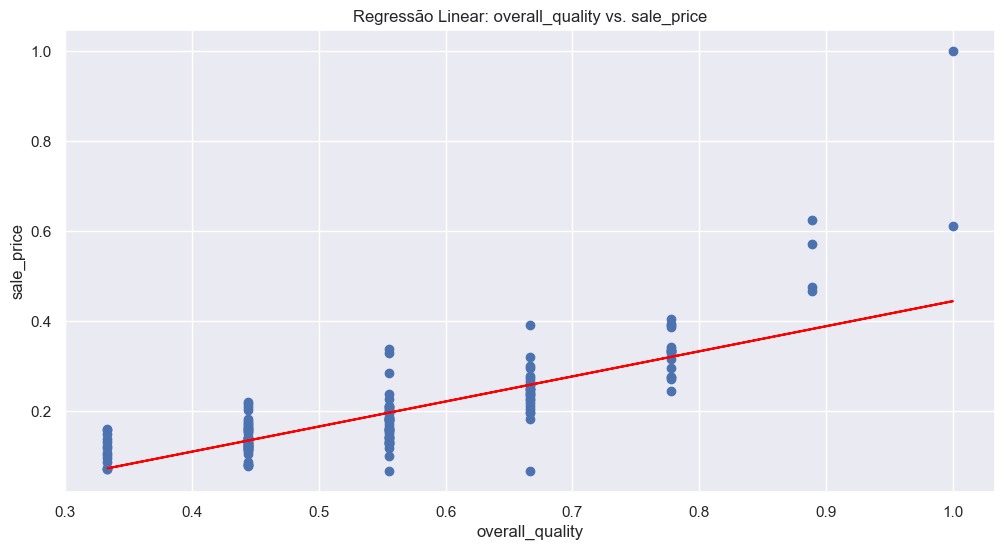

In [60]:
figure, _ = plt.subplots(figsize = (12, 6))
plt.scatter(
    x_test,
    y_test,
)
plt.plot(
    x_test,
    predicao,
    color = "red"
)
plt.title("Regressão Linear: overall_quality vs. sale_price")
plt.xlabel("overall_quality")
plt.ylabel("sale_price")
plt.show()

### Imprimindo o Root-Mean-Squared-Error

In [61]:
mean_squared_log_error(y, x, squared = False)

0.270170094750498

## 14.2. Regressão Linear (utilizando a coluna <b><i>ground_living_area</i></b>)

### Normalizando as duas colunas que serão utilizadas:
* ground_living_area

In [62]:
train_df_processed["ground_living_area"] = (train_df_processed["ground_living_area"] - train_df_processed["ground_living_area"].min()) / (train_df_processed["ground_living_area"].max() - train_df_processed["ground_living_area"].min())

*ground_living_area* foi normalizado utilizando a fórmula: (valor_atual - valor_minimo) / (valor_maximo - valor_minimo)

### Calculando θ<sub>0</sub> e θ<sub>1</sub>

In [63]:
x = train_df_processed[["ground_living_area"]]
y = train_df_processed.sale_price

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)
modelo_linear = LinearRegression().fit(x_train, y_train)

theta_0 = modelo_linear.intercept_
theta_1 = modelo_linear.coef_

### Imprimindo θ<sub>0</sub> e θ<sub>1</sub>

In [64]:
print("Theta 0 = ", theta_0)
print("Theta 1 = ", theta_1[0])

Theta 0 =  0.028121322
Theta 1 =  0.7880571


### Fazendo previsão dos dados

In [65]:
predicao = modelo_linear.predict(x_test)
predicao

array([0.30100167, 0.26358825, 0.2560165 , 0.15609895, 0.15431735,
       0.12076405, 0.11571621, 0.17450872, 0.2050927 , 0.10680826,
       0.16931242, 0.81617844, 0.22617485, 0.09404019, 0.1174978 ,
       0.19410622, 0.1976694 , 0.10680826, 0.13768917, 0.2098436 ,
       0.19499701, 0.09329786, 0.16352224, 0.35771564, 0.17718111,
       0.22172087, 0.23344968, 0.32297462, 0.19885713, 0.18534672,
       0.3526678 , 0.2251356 , 0.26358825, 0.12506956, 0.17925961,
       0.27116004, 0.14986336, 0.22216628, 0.12789041, 0.18475287,
       0.3449476 , 0.13546216, 0.38340026, 0.14837873, 0.13976768,
       0.20034179, 0.17747803, 0.3835487 , 0.18430747, 0.1645615 ,
       0.20375651, 0.17881423, 0.24220918, 0.15936519, 0.28986675,
       0.2107344 , 0.34257212, 0.18965223, 0.24636622, 0.19707553,
       0.1384315 , 0.12313952, 0.36899906, 0.21221906, 0.21667303,
       0.33128873, 0.15669282, 0.20642889, 0.19841173, 0.24146684,
       0.31451207, 0.25319564, 0.19959946, 0.30768266, 0.22038

### Plotando o resultado final
* Gráfico de dispersão
* Gráfico da reta

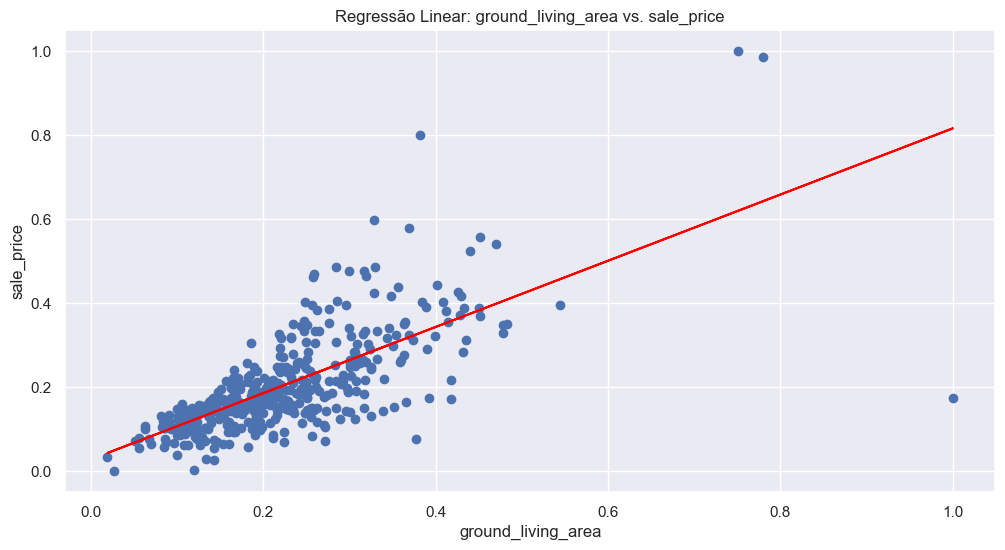

In [66]:
figure, _ = plt.subplots(figsize = (12, 6))
plt.scatter(
    x_test,
    y_test,
)
plt.plot(
    x_test,
    predicao,
    color = "red"
)
plt.title("Regressão Linear: ground_living_area vs. sale_price")
plt.xlabel("ground_living_area")
plt.ylabel("sale_price")
plt.show()

### Imprimindo o Root Mean Squared Error

In [67]:
mean_squared_log_error(y_test, predicao, squared = False)

0.06251876748158458

## 15. Conclusão

A coluna *overall_quality* demonstrou maior correlação com o preço final (*sale_price*) do que a coluna *ground_living_area*, todavia pelo comportamento demonstrado no gráfico de predição, onde os dados estavam distribuidos em uma linha vertical, seu root mean squared error foi muito maior do que o da coluna *ground_living_area*.
<br>
A coluna *ground_living_area* também possuim um comportamento onde, no início, os dados ficam agrupados, porém os dados vão se dispersando conforme o gráfico avança, gerando vários outliers.
<br>
Foi escolhido não retirar os outliers de nenhuma das colunas trabalhadas acima para evitar o overfitting